In [3]:
import numpy as np
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from display_network import *

In [39]:
mntrain = MNIST('MNIST/')
mntrain.load_training()
Xtrain_all = np.asarray(mntrain.train_images)
ytrain_all = np.array(mntrain.train_labels.tolist())
print(Xtrain_all.shape, ytrain_all.shape, sep=' ')

mntest = MNIST('MNIST/')
mntest.load_testing()
Xtest_all = np.asarray(mntest.test_images)
ytest_all = np.array(mntest.test_labels.tolist())

(60000, 784) (60000,)


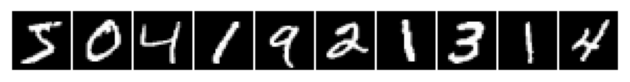

5 0 4 1 9 2 1 3 1 4 

In [50]:
N = 10

img = display_network(Xtrain_all[:N,:].T, 1, N)

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

for i in range(N):
    print(ytrain_all[i], end=' ')


In [41]:
cls = [[0], [1]]
def extract_data(X, y, classes):
    """
    X: numpy array, matrix of size (N, d), d is data dim
    y: numpy array, size (N, )
    cls: two lists of labels. For example: 
        cls = [[1, 4, 7], [5, 6, 8]]
    return:
        X: extracted data
        y: extracted label 
            (0 and 1, corresponding to two lists in cls)
    """
    y_res_id = np.array([])
    for i in classes[0]:
        y_res_id = np.hstack((y_res_id, np.where(y == i)[0]))
    n0 = len(y_res_id)
    
    for i in classes[1]:
        y_res_id = np.hstack((y_res_id, np.where(y == i)[0]))
    n1 = len(y_res_id) - n0

    y_res_id = y_res_id.astype(int)
    X_res = X[y_res_id, :] / 255.0
    y_res = np.asarray([0] * n0 + [1] * n1)
    return X_res, y_res

# extract data for training 
(X_train, y_train) = extract_data(Xtrain_all, ytrain_all, cls)
print (X_train.shape, y_train.shape, sep=' ')

# extract data for test 
(X_test, y_test) = extract_data(Xtest_all, ytest_all, cls)

(12665, 784) (12665,)


In [48]:
# train the logistic regression model 
logreg = linear_model.LogisticRegression(C=1e5) # just a big number 
logreg.fit(X_train, y_train)

# predict 
y_pred = logreg.predict(X_test)
print ("Accuracy: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy: 99.91 %


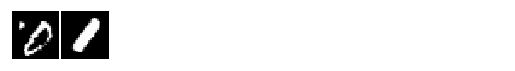

1 0 

In [57]:
# display misclassified image(s)
mis = np.where((y_pred - y_test) != 0)[0]
Xmis = X_test[mis, :]
ymis = y_pred[mis]

plt.axis('off')
A = display_network(Xmis.T, 1, 10)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()

for i in ymis:
    print(i, end=' ')

In [58]:
logreg.fit(Xtrain_all, ytrain_all)
y_pred = logreg.predict(Xtest_all)
print ("Accuracy: %.2f %%" %(100*accuracy_score(ytest_all, y_pred.tolist())))

Accuracy: 92.43 %


c:\Users\PC\anaconda3\envs\ml_learning\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


: 